## Names of group members (max 2):
    
    Dilsiz (Onur)
    Kazaferi (Atis)




## K means

**First look at this?!** This is a horrible thing if you are not aware of it in Python. You may need it (I did).

In [15]:
import numpy as np

xt = np.array([3, 4, 5, 6])
print('xt = ',xt)
yt = xt
zt = xt.copy()
print('yt = ',yt)
yt[0] = 0
print('yt = ',yt) ## this you expect
print('xt = ',xt) ## this is the exciting one :-(
print('zt = ',zt) ## with a copy it works as you would like

xt =  [3 4 5 6]
yt =  [3 4 5 6]
yt =  [0 4 5 6]
xt =  [0 4 5 6]
zt =  [3 4 5 6]


### Method 1. Using Kmeans form package sklearn.

<ul>
    <li> Make a plot function that gives the same colour to data points within one cluster. 
    </li>
    <li> Call KMeans from the package. (Consult the sklearn manual online and figure out how to do it.)
    </li>
    <li> Plot next to the data points also the centres of the clusters (${\bf{Z}}_j$)
    </li>
 </ul>

(2, 19)


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:867: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1391: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


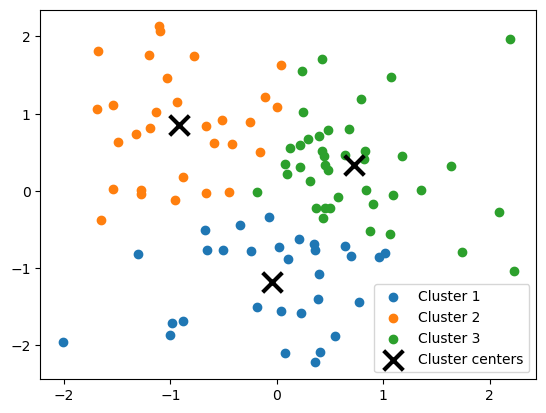

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

## the data set for testing

df = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24] ])
print(df.shape)

k = 3 ## the number of clusters
def plotclusters(X, labels, centers):
    
    colors = ['C{}'.format(i) for i in range(k)] ## [C(1), C(2), C(3)] clusters 
    for i in range(k):
        plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label='Cluster {}'.format(i+1)) ## for cluster 1, 
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=200, linewidths=3, label='Cluster centers')
    plt.legend()
    plt.show()
# Generate some sample data
X = np.random.randn(100, 2)

# Apply KMeans clustering with k=3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Plot the clusters and centers
plotclusters(X, kmeans.labels_, kmeans.cluster_centers_)

### Method 2. A heuristic, simple, fast, pretty good algorithm.

<ol>
    <li> Initialization. Choose $k$ random points as centres; plot the data black, the three centers in colour
    </li>
    <li> Function: assigmnent. Compute for every data point the closest centre: assign the data point to that cluster.
    </li>
    <li> Function: replace. Put all centres as the average of the data in their cluster.
    </li>
    <li> Script. Repeat assignment, replace, plotclusters until nothing changes. 
    </li>
 </ol>

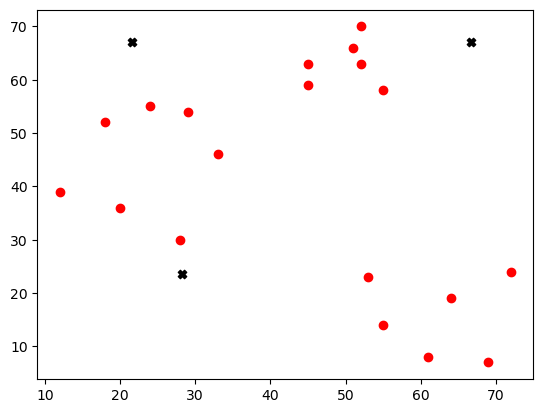

In [22]:
## Part 1. Initialization.
import random
k = 3
minX = min(df[0]) ## min value of X  from dataset
maxX = max(df[0]) ## max value of X from dataset
minY = min(df[1]) ## min value of Y from dataset
maxY = max(df[1]) ## max value of Y from dataset
# labels = np.random.randint(0, 3, size=19)  # Randomly assign each data point to one of three clusters

centres = np.zeros((k,2)) ## empty array for centers coordinates

for i in range(k): ##randomly select 3 points as centers
    centres[i] = [random.uniform(minX, maxX), random.uniform(minY, maxY)] 
df = df.T ##transpose the dataset for easier use
### plot data and centres, print centres
plt.scatter(df[:, 0], df[:, 1], c='red')

plt.scatter(centres[:, 0],centres[:, 1],c='black',marker='X')
plt.show()
# plotclusters(df.T, labels,centres)

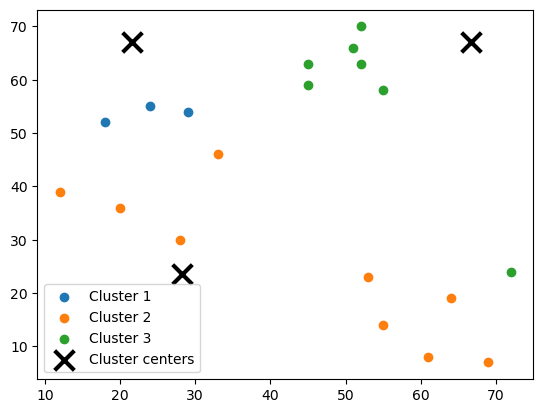

In [23]:
## Part 2. Function: assigmnent.
# print(df)
import math
def assignment(df, centres):
    labels = np.zeros(df.shape[0]) ## labels vector with the same dimension as dataset
    length= df.shape[0] ## amount of datapoints
    for i in range(0,length): ##Assignment for all datapoints
        mindistance= 100000 
        point= df[i] 
#         print(point[0], point[1])
        for k in range(len(centres)): ## calculate function= shortest distance
            center= centres[k] 
            distance = (center[0]-point[0])**2 + (center[1]- point[1])**2 
            distance = math.sqrt(distance)
            if(distance< mindistance): 
                mindistance = distance
                labels[i] =  k
    return labels

labels = assignment(df,centres)
plotclusters(df,labels,centres)

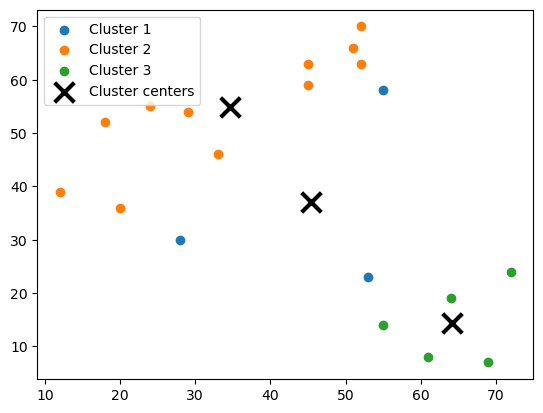

In [5]:
## Part 3. Function: assigmnent.
def replace(df, centres):
    labels = assignment(df, centres)
    k=len(centres)
    clusterCenterSums= np.zeros((k,2))
    length = df.shape[0]
    
    clusterCount = np.zeros(k)
    for k in labels:
        clusterCount[int(k)]+=1
    
    for index in range(length):
        point = df[index]
        k = int(labels[index])
        clusterCenterSums[k][0]+= point[0]
        clusterCenterSums[k][1]+= point[1]
    for index in range(len(clusterCenterSums)):
        centreX = clusterCenterSums[index][0] / clusterCount[index]
        centreY = clusterCenterSums[index][1] / clusterCount[index]
        centres[index] = [centreX, centreY]
    
replace(df,centres)  
plotclusters(df,labels,centres)

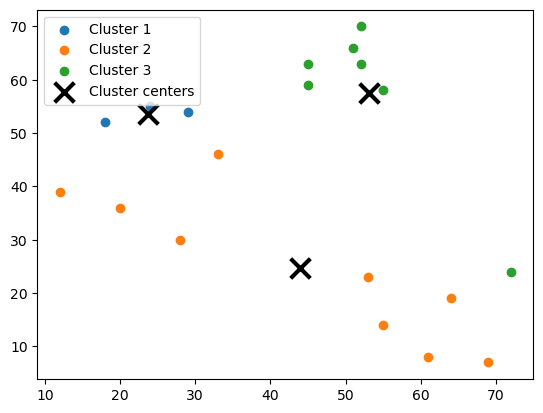

In [24]:
## Part 4. Script.
flag=True
while (flag):
    oldLabels =labels
    oldCentres =centres
    labels = assignment(df,centres)    
    replace(df,centres)
    if(oldLabels== labels, oldCentres==centres):
        flag=False

plotclusters(df,labels, centres)

### Method 3. A genetic algorithm.

It suffices to describe the setup of the program: no programming (unless you want to do "The use of genetic optimization in ML and AI" as your project). 



```python

x = ... (type)

function F(x)
    fitness = 0
    for i in range()
        ...
        fitness = fitness + ...
    return fitness
```

```python
function cross(A, B)
    


    return(C)
```

```python
function mutate(C)




    return(D)
```

In [26]:

'''
Assuming that we have a function of fitness, a function for cross over between parent A and B, and 
a function to mutate a cell, we proceed with the following execution pseudocode

Firstly, we define fitness' objective function as the distance between a point and the nearby center. We pick the minimum in the center set,
and aim to minimize this distance. We can do this manually, or cia the kmeans function, fitness is equal to the kmeans_fit.

In the context of the genetic algorithm, we have chromosome = set of centers (k=3)

'''

#### We create a random population of centers, it will need a population size, K=3, and tak the amount of columns just like X.

#### We calculate the fitness of each center in each center in the population using the fitness function

#### Repeat for epoch until num_iterations

    ### Based on the fitness value (eg if lower or higher) select a subset of centers from the population: parent A and B.
            # For the mst optimal heuristic of selection, we can experiment. For example we can take randomly, or choose based on fitness level.

    ### Repeat until convergence: maximum number of generations

        ## Crossover: to create new centers we combine the selected centers (parents) in the middle, or randomly
            # We can choose between randomly combining them, or taking the midpoint to cross genes.
            # offspring = crossover(population(A], population[B])
        ## Randomly mutate some of the centers in the crossed over gene
            #Substitute one out of 3 centers with a point nearby or random 
            # we can also experiment here what works best for mutation
            #offspring = mutation(offspring[(randomly or function to select)])
        ##Evaluate the fitness of the new centers from the population
            #offspring_fitness= fitness(offspring)
        ## Select the centers with the best fitness value (needs to be recorded)
            #new_pop = pop[argmin(fitness)]
    ### Assign data points like in the second method

    ### Calculate the mean of each cluster and update the centers to be new (x,y) means

"\nAssuming that we have a function of fitness, a function for cross over between parent A and B, and \na function to mutate a cell, we proceed with the following execution pseudocode\n\nFirstly, we define fitness' objective function as the distance between a point and the nearby center. We pick the minimum in the center set,\nand aim to minimize this distance. We can do this manually, or cia the kmeans function, fitness is equal to the kmeans_fit.\n\nIn the context of the genetic algorithm, we have chromosome = set of centers (k=3)\n\n"